In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Get File from Drive using file-ID
import pandas as pd
!pip install PyDrive

data = pd.read_csv('california_housing_train.csv')
data.head()

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [22]:
# a) Find standard deviation, variance of every numerical attribute
std_deviation = data.std()
variance = data.var()
print("Standard Deviation:\n", std_deviation)
print("\nVariance:\n", variance)

Standard Deviation:
 longitude                  2.005166
latitude                   2.137340
housing_median_age        12.586937
total_rooms             2179.947071
total_bedrooms           421.499452
population              1147.852959
households               384.520841
median_income              1.908157
median_house_value    115983.764387
dtype: float64

Variance:
 longitude             4.020692e+00
latitude              4.568221e+00
housing_median_age    1.584310e+02
total_rooms           4.752169e+06
total_bedrooms        1.776618e+05
population            1.317566e+06
households            1.478563e+05
median_income         3.641061e+00
median_house_value    1.345223e+10
dtype: float64


In [23]:
# b) Find covariance and perform Correlation analysis using Correlation coefficient
#Variance is a measure of magnitude because it is expressed as a number.
#Covariance, on the other hand, describes the direction of a relationship between two variables.
#It is defined as a positive or negative value rather than a number.
covariance_matrix = data.cov()
correlation_matrix = data.corr()
print("\nCovariance Matrix:\n", covariance_matrix)
print("\nCorrelation Matrix:\n", correlation_matrix)


Covariance Matrix:
                        longitude      latitude  housing_median_age   
longitude               4.020692     -3.965185           -2.883552  \
latitude               -3.965185      4.568221            0.442652   
housing_median_age     -2.883552      0.442652          158.430983   
total_rooms           205.489998   -180.652575        -9904.992690   
total_bedrooms         60.685329    -62.497196        -1700.026828   
population            234.017167   -272.963262        -4275.001960   
households             45.974646    -61.558579        -1465.311997   
median_income          -0.059248     -0.327506           -2.784428   
median_house_value -10461.246889 -35924.378200       155853.476977   

                     total_rooms  total_bedrooms    population    households   
longitude           2.054900e+02    6.068533e+01  2.340172e+02  4.597465e+01  \
latitude           -1.806526e+02   -6.249720e+01 -2.729633e+02 -6.155858e+01   
housing_median_age -9.904993e+03   -1.

In [24]:
# c) How many independent features are present in the given dataset?
#Correlation finds the direction of the relationship along with the degree of the relationship.
independent_features = np.linalg.matrix_rank(data.corr())
print("\nNumber of independent features:", independent_features)


Number of independent features: 9


In [25]:
# d) Can we identify unwanted features?
# we can analyze correlation coefficients to identify features strongly correlated with each other.
# Features with high correlation might be candidates for removal if redundancy is present.
# Features with high correlation might be candidates for removal.
#Correlation shows us both, the direction and magnitude of how two quantities vary with each other.

unwanted_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            unwanted_features.add(colname)

print("\nd) Unwanted features:", unwanted_features)


d) Unwanted features: {'population', 'households', 'total_bedrooms', 'latitude'}


In [26]:
# e) Perform data discretization using equi-frequency binning method on the population attribute
num_bins = 5  # Choose the number of bins as needed
data['population'] = pd.qcut(data['population'], q=num_bins, labels=False)


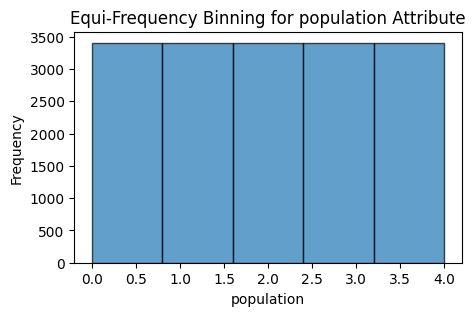

In [27]:
# Visualize the equi-frequency bins graphically
plt.figure(figsize=(5, 3))
plt.hist(data['population'], bins=num_bins, edgecolor='black', alpha=0.7)
plt.title('Equi-Frequency Binning for population Attribute')
plt.xlabel('population')
plt.ylabel('Frequency')
plt.show()

In [28]:
# f) Normalize RestBP, chol, and MaxHR attributes using different normalization techniques
attributes_to_normalize = ['longitude', 'latitude']

# Min-Max normalization
min_max_scaler = MinMaxScaler()
data_min_max_normalized = data.copy()
data_min_max_normalized[attributes_to_normalize] = min_max_scaler.fit_transform(data[attributes_to_normalize])


In [29]:
# Z-score normalization
z_score_scaler = StandardScaler()
data_z_score_normalized = data.copy()
data_z_score_normalized[attributes_to_normalize] = z_score_scaler.fit_transform(data[attributes_to_normalize])


In [30]:
# Decimal scaling normalization
decimal_scaling_factor = 10 ** (len(str(int(data[attributes_to_normalize].abs().max().max()))) - 1)
data_decimal_scaled = data.copy()
data_decimal_scaled[attributes_to_normalize] = data[attributes_to_normalize] / decimal_scaling_factor

In [31]:
# Display the results
print("\nMin-Max Normalized DataFrame:\n", data_min_max_normalized.head())
print("\nZ-Score Normalized DataFrame:\n", data_z_score_normalized.head())
print("\nDecimal Scaled DataFrame:\n", data_decimal_scaled.head())



Min-Max Normalized DataFrame:
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0   1.000000  0.175345                15.0       5612.0          1283.0  \
1   0.984064  0.197662                19.0       7650.0          1901.0   
2   0.975100  0.122210                17.0        720.0           174.0   
3   0.974104  0.116897                14.0       1501.0           337.0   
4   0.974104  0.109458                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0           2       472.0         1.4936             66900.0  
1           2       463.0         1.8200             80100.0  
2           0       117.0         1.6509             85700.0  
3           0       226.0         3.1917             73400.0  
4           0       262.0         1.9250             65500.0  

Z-Score Normalized DataFrame:
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0   2.619365 -0.671520          